## Analiza podatkov


V tej raziskavi analiziramo podatke s spletne trgovine za video igre Steam. Hipoteze, ki jih obravnavamo so:
- S časom se popularnost posameznih žanrov iger spreminja, v vsakem letu lahko določimo najbolj popularne 
- S časom povprečna cena izdelka narašča
- S časom je proporcionalno vedno več brezplačnih iger v primerjavi s številom vseh iger na trgu
- Veliko večino vseh izdelkov na Steam-u predstavljajo video igre, cenejše od 10€
- Kvaliteta izdelka ter število igralcev sta neposredno povezana s ceno izdelka

Najprej uvozimo datoteki igre.csv ter znacke.csv

In [6]:
import pandas as pd 

igre = pd.read_csv("../../PROG1/IndieAnalysis/igre.csv")
znacke = pd.read_csv("../../PROG1/IndieAnalysis/znacke.csv")

In [7]:
igre

,id,title,description,reviews_num,reviews_perc,year,price
0,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00
1,1,Dota 2,"Every day, millions of players worldwide enter...",1927523,82,2013,0.00
2,2,Apex Legends™,"Apex Legends is the award-winning, free-to-pla...",588626,83,2020,0.00
3,3,Call of Duty®: Modern Warfare® II,Call of Duty®: Modern Warfare® II drops player...,178727,61,2022,69.99
4,4,Football Manager 2023,"Build your dream squad, outsmart your rivals a...",6292,86,2022,59.99
...,...,...,...,...,...,...,...
24069,24069,Questr,Manage a party of personalities on epic (and g...,17,76,2017,2.99
24070,24070,Devil's Toy,"Devil's Toy is a first person horror game, is ...",19,63,2018,0.79
24071,24071,Ghost Blood,Ghost Blood is a first-person action game wher...,32,75,2021,3.99
24072,24072,MahJong,MahJong generates random tile arrangements tha...,15,66,2008,4.99


In [8]:
znacke

,id,tag
0,0,FPS
1,0,Shooter
2,0,Multiplayer
3,0,Competitive
4,0,Action
...,...,...
255331,24073,Linear
255332,24073,Narration
255333,24073,Text-Based
255334,24073,Funny


#### Popularnost različnih žanrov
Radi bi ugotovili kako se s časom spreminja popularnost različnih žanrov. Le-teh je precej veliko,
zato si oglejmo le najbolj popularne:

Prvi korak je, da združimo tabeli z znackami ter igrami glede na ID stevilko

In [9]:
skupna_tabela = pd.merge(igre, znacke, left_on='id', right_on='id')
skupna_tabela

,id,title,description,reviews_num,reviews_perc,year,price,tag
0,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,FPS
1,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,Shooter
2,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,Multiplayer
3,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,Competitive
4,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,Action
...,...,...,...,...,...,...,...,...
255331,24073,Naked News,Join in the fun with an unforgettable experien...,95,66,2020,0.79,Linear
255332,24073,Naked News,Join in the fun with an unforgettable experien...,95,66,2020,0.79,Narration
255333,24073,Naked News,Join in the fun with an unforgettable experien...,95,66,2020,0.79,Text-Based
255334,24073,Naked News,Join in the fun with an unforgettable experien...,95,66,2020,0.79,Funny


Spodaj vidimo 20 najbolj popularnih značk in pri vsaki število z njimi označenih iger:

In [34]:
tag_popularity = skupna_tabela.groupby('tag').size().sort_values(ascending=False).head(20)
tag_popularity

# Seznam 20 najbolj popularnih značk
top_tags = tag_popularity.keys().to_list() 


tag
Indie           14876
Singleplayer    14267
Adventure       11056
Action          10514
Casual           9947
2D               7374
Strategy         5662
Simulation       5658
Atmospheric      5608
RPG              5229
Puzzle           4971
Multiplayer      4246
Cute             3716
Exploration      3426
Anime            3409
Funny            3388
Colorful         3387
Fantasy          3281
3D               3239
First-Person     3211
dtype: int64

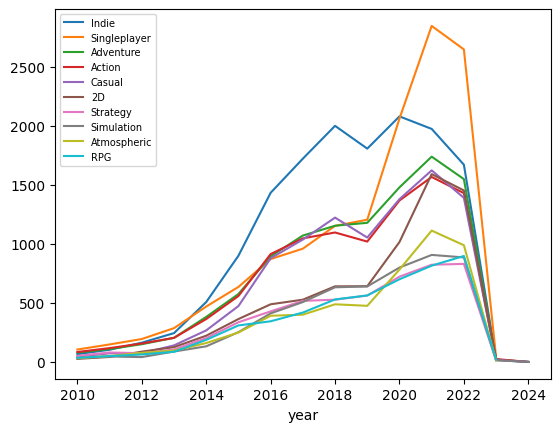

In [60]:
import matplotlib as mpl    
def plot_tag_over_time(tag: str):
    '''Sprejme značko (naj bo ena izmed 20 zgoraj) in nariše graf 
    popularnosti značke v odvisnosti od časa'''
    temp = skupna_tabela[skupna_tabela.tag == tag]
    temp[temp['year'] >= 2010].groupby('year').size().plot()

for tag in top_tags[:10]:
    # V grafu je lahko največ 10 barv, zato bomo narisali dva grafa
    plot_tag_over_time(tag)
mpl.pyplot.legend(top_tags[:10], prop={'size' : 7}, loc='upper left')

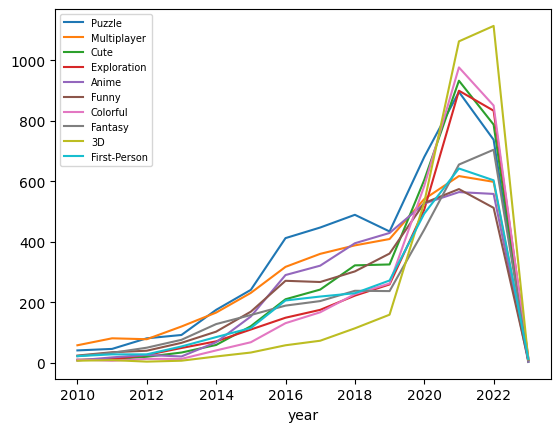

In [61]:
for tag in top_tags[10:]:
    plot_tag_over_time(tag)
mpl.pyplot.legend(top_tags[10:], prop={'size' : 7}, loc='upper left')

Opazimo torej, da so vse značke doživele približno enako rast skozi čas, z izjemo žanra samostojno proizvedenih iger oz. Indie iger, ki so približno enakomerno zastopane v zadnjih sedmih letih.
Video igre so namreč šele v zadnjih nekaj letih postale večja industrija, medtem ko so jih pred tem večinoma ustvarjali manjši samostojni studii.
**Največjo rast** so v zadnjih letih doživele igre za enega igralca (oz. Singleplayer igre), kar je samo po sebi umevno, namreč ustvarjanje video iger, ki so namenjene večim igralcem je težje in dražje zaradi vzdrževanja strežnikov, ter potrebe po ohranjanju igralske skupnosti za daljšo življensko dobo igre.

Nemogoče pa je določiti najbolj popularno značko v vsakem letu ravno zaradi njihove enakomerne rasti. Hipoteza torej ne velja.

#### Sprememba standardne cene izdelkov
Glede na to da je med podatki mnogo iger, ki so zanemarljivo majhne/nepomembne, se najprej omejimo na igre z več kot 10.000 ocenami

In [93]:
igre_z_veliko_ocenami = igre[igre['reviews_num'] >= 10000]
igre_z_veliko_ocenami

,id,title,description,reviews_num,reviews_perc,year,price
0,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00
1,1,Dota 2,"Every day, millions of players worldwide enter...",1927523,82,2013,0.00
2,2,Apex Legends™,"Apex Legends is the award-winning, free-to-pla...",588626,83,2020,0.00
3,3,Call of Duty®: Modern Warfare® II,Call of Duty®: Modern Warfare® II drops player...,178727,61,2022,69.99
5,5,War Thunder,War Thunder is the most comprehensive free-to-...,369810,78,2013,0.00
...,...,...,...,...,...,...,...
22962,22962,Sven Co-op,Sven Co-op is a co-operative game originally b...,26599,93,1999,0.00
22966,22966,SCP: Secret Laboratory,Deep within the SCP Foundation during a contai...,153532,91,2017,0.00
22970,22970,Spellbreak,Spellbreak is a multiplayer action-spellcastin...,13684,85,2020,0.00
22973,22973,Muck,Muck is a survival-roguelike. Collect resource...,138913,94,2021,0.00


Opazovali bomo dve ločeni skupini iger iz tega seznama:
- Prva bodo **brezplačne igre**. Tu nas zanima kako raste njihovo *število v razmerju s časom*. Sumimo, da jih je s časom vedno več, saj mnogi developerji posvojujejo live-service model služenja, kjer je igra brezplačna, omogoča pa druge načine zaslužka znotraj igre 
- Druga bodo igre, ki **niso brezplačne**. V tem primeru opazujemo njihovo *povprečno ceno skozi čas*.

In [94]:
brezplacne = igre_z_veliko_ocenami[igre_z_veliko_ocenami['price'] == 0.0]
nebrezplacne = igre_z_veliko_ocenami[igre_z_veliko_ocenami['price'] != 0.0]

<AxesSubplot: xlabel='year'>

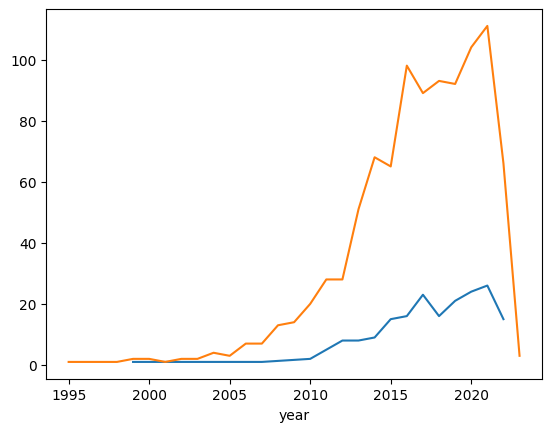

In [95]:
brezplacne.groupby('year').size().plot()
igre_z_veliko_ocenami.groupby('year').size().plot()

Hipoteza, da je vedno več popularnih brezplačnih iger iz zgornjega grafa ne more biti potrjena, saj je število takih iger v primerjavi s številom vseh popularnih iger precej povezano. Iz grafa se vidi, da je število brezplačnih najbolj naraslo takrat, ko je tudi splošno število iger naraslo, ter padlo takrat, ko je padlo tudi število vseh iger. Torej ni opaznega trenda naraščanja brezplačnih iger.

Oglejmo si še drugo skupino iger, tj. ne-brezplačnih iger.

<AxesSubplot: xlabel='year'>

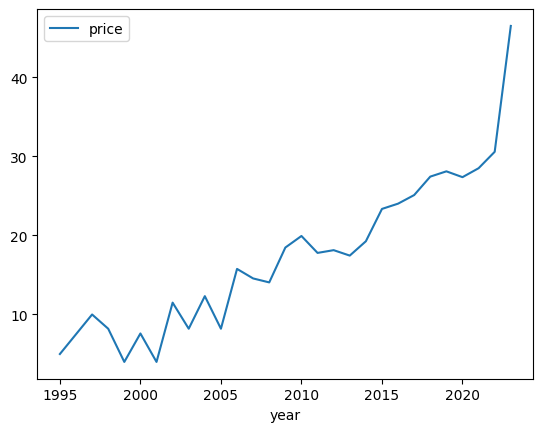

In [97]:
nebrezplacne[['year', 'price']].groupby('year').mean().plot()

Opazimo, da je povprečna cena video iger od 2000 do sedanjosti narasla. Porast zadnjih nekaj let lahko pripišemo dvigu standarne cene izdelkov, medtem ko moramo za leta pred 2018 upoštevati, da se starejši izdelki prodajajo po nižji ceni, kot ko so bili prvotno postavljeni na trg.
Iz zgornjih opažanj se je porodilo vprašanje koliko iger na Steam-u je dražjih od 10 evrov. Pogost fenomen je prodaja t.i. shovelware iger, ki so narejene v kratkem času in so nižje kvalitete, njihov cilj pa je le hiter zaslužek na podlagi plagiatorstva idej drugih developerjev, zato se običajno prodajajo po nižjih cenah. Ker lahko na Steam-u kdorkoli prodaja svoje izdelke, jim družbo delajo tudi drugi zločini proti bogu, ki se prodajajo za manj kot evro in so pogosto le eksperimenti samostojnih razvijalcev in niso zares namenjeni izpostavljenosti človeškim očem. Oglejmo si koliko je takih izdelkov. Zaradi tega, kako hitro se take igre pojavljajo in izginjajo, se omejimo le na zadnjih pet let.

<AxesSubplot: xlabel='year'>

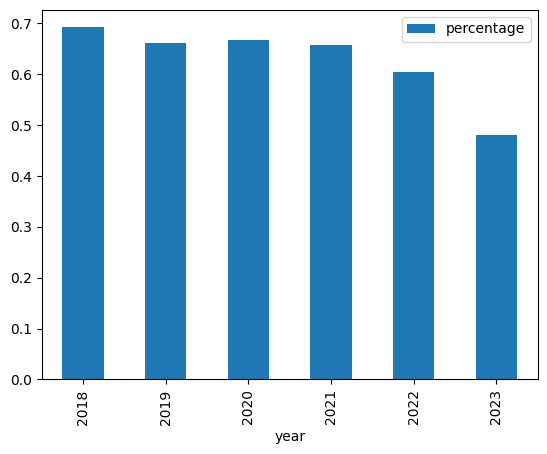

In [111]:
zadnjih_pet_let = igre[igre['year'] >= 2018]
# V podatkih je natanko ena igra, ki izide leta 2024 in posledicno pokvari statistiko, zato jo odstranimo iz podatkov
zadnjih_pet_let = zadnjih_pet_let[zadnjih_pet_let['year'] <= 2023] 
cheap = zadnjih_pet_let[zadnjih_pet_let['price'] <= 10.00]


all_num = igre.groupby('year', as_index=False).size() # Število vseh iger po letih
cheap_num = cheap.groupby('year', as_index=False).size() # Število poceni iger po letih
skupaj = pd.merge(all_num, cheap_num, left_on='year', right_on='year')

# Dodamo nov stolpec v tabelo, ki predstavlja delež poceni iger v tistem letu
skupaj['percentage'] = skupaj.size_y / skupaj.size_x

skupaj.plot.bar(x='year', y='percentage')

Poglejmo še igre, cenejše od enega evra:

<AxesSubplot: xlabel='year'>

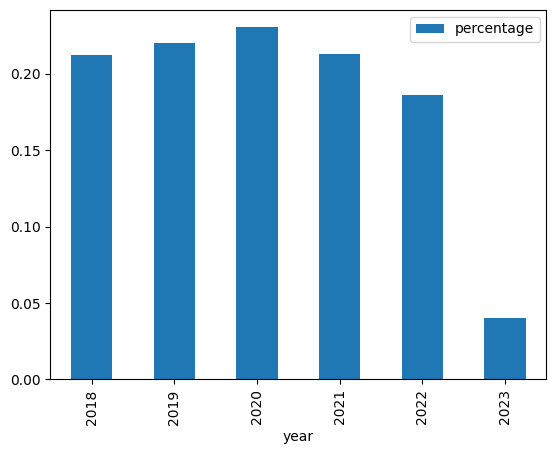

In [115]:
extra_cheap = zadnjih_pet_let[zadnjih_pet_let['price'] <= 1.00]
extra_cheap_num = extra_cheap.groupby('year', as_index=False).size()

skupaj2 = pd.merge(all_num, extra_cheap_num, left_on='year', right_on='year')
skupaj2['percentage'] = skupaj2.size_y / skupaj2.size_x

skupaj2.plot.bar(x='year', y='percentage')

Iz zgornjih grafov res lahko zaključimo, da je večina iger na spletni trgovini cenejših od 10€, toda to porodi naslednji vprašanji: 
- Ali višja cena pomeni tudi več igralcev? 
- Ali višja cena pomeni tudi višjo kvaliteto? 
Število igralcev ni neposredno dostopno, toda lahko ga aproksimiramo s številom ocen, kvaliteto igre pa bomo označili z deležem pozitivnih ocen.

<AxesSubplot: xlabel='price', ylabel='reviews_num'>

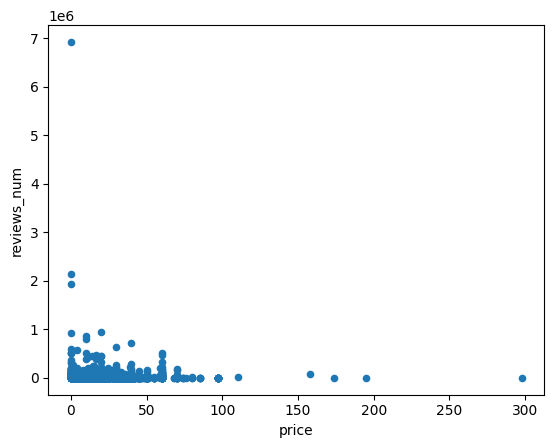

In [116]:
igre.plot.scatter(x='price', y='reviews_num')

Kot zgornji graf pokaže, se najde nekaj iger ki stanejo več kot 100 evrov, zato jih bomo zanemarili zaradi njihovega majhnega števila

C:\Users\Matej\AppData\Local\Temp\ipykernel_12672\2521481741.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  igre[igre['price'] <= 100][igre['reviews_num'] <= 3e6].plot.scatter(x='price', y='reviews_num')


<AxesSubplot: xlabel='price', ylabel='reviews_num'>

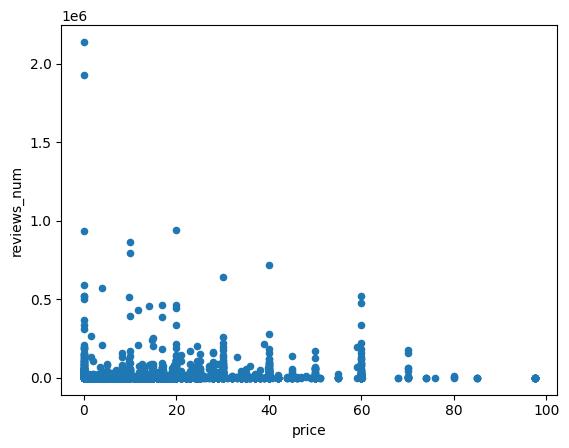

In [117]:
igre[igre['price'] <= 100][igre['reviews_num'] <= 3e6].plot.scatter(x='price', y='reviews_num')

Kot graf pokaže, cena ne vpliva na število igralcev. Poglejmo še kvaliteto v primerjavi s ceno igre.

<AxesSubplot: xlabel='price', ylabel='reviews_perc'>

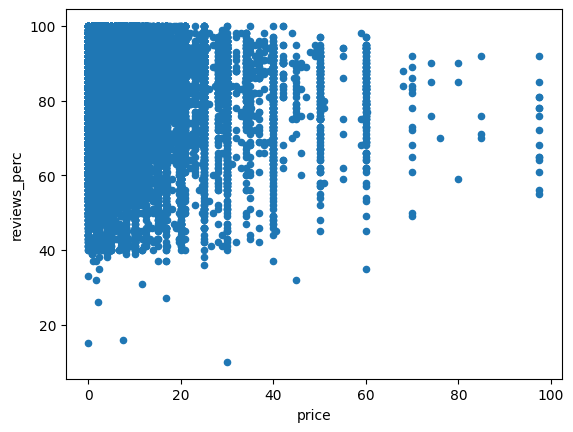

In [118]:
igre[igre['price'] <= 100].plot.scatter(x='price', y='reviews_perc')

Vidimo, da tudi med ceno in kvaliteto izdelka ni opaznega razmerja, saj se tako pri poceni igrah kot pri dražjih igrah pojavijo raznovrstne ocene. 
Za zaključek, s to raziskavo nismo pokazali ničesar pretresljivega ali kakorkoli uporabnega, saj je trg video iger preveč nezanesljiv in nov, da bi bil primeren za tovrstno analizo.